In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('http://taanila.fi/ENB2012_data.xlsx')

df.columns = ['Relative Compactness', 'Surface Area', 'Wall Area',
             'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area',
             'Glazing Area Distribution', 'Heating Load', 'Cooling Load']
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

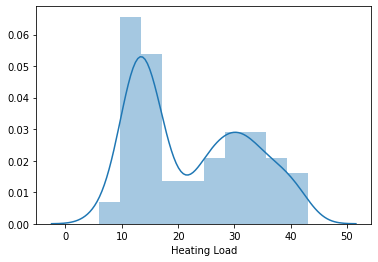

In [4]:
sns.distplot(df['Heating Load'])

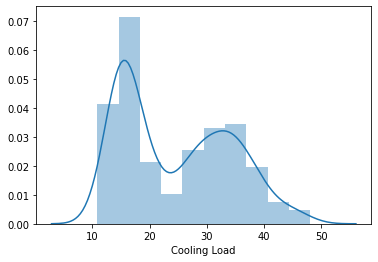

In [5]:
sns.distplot(df['Cooling Load'])

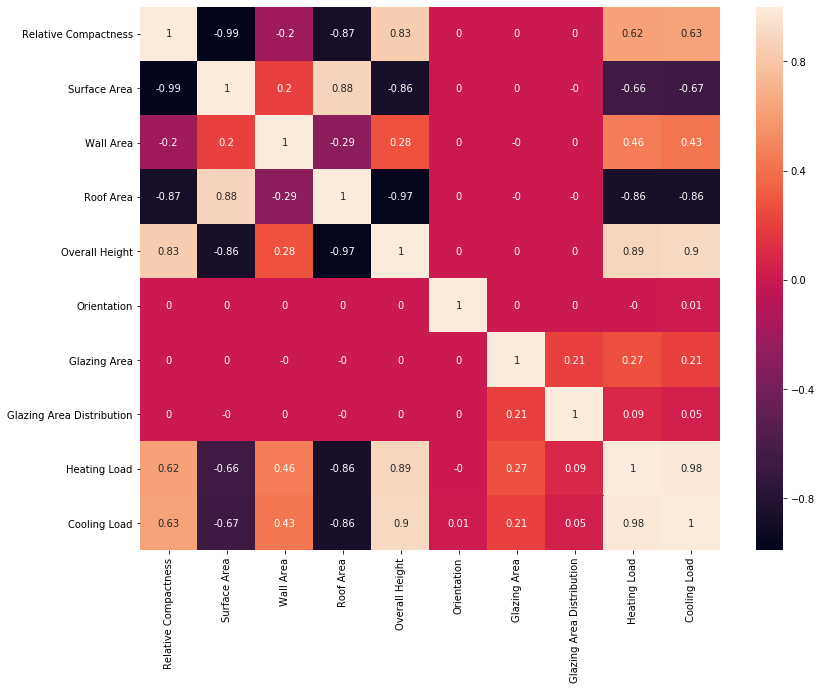

In [6]:
correlation_matrix = df.corr().round(2)

plt.figure(figsize=(13,10))

sns.heatmap(data=correlation_matrix, annot=True)

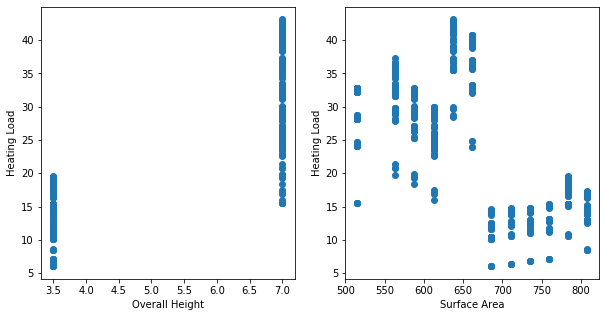

In [7]:
features = ['Overall Height', 'Surface Area']

target = df['Heating Load']

plt.figure(figsize=(10, 5))

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.scatter(df[feature], target)
    plt.xlabel(feature)
    plt.ylabel('Heating Load')

In [8]:
X = df[features]
y = target

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                   random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 2)
(154, 2)
(614,)
(154,)


In [10]:
from sklearn.linear_model import LinearRegression

malli = LinearRegression().fit(X_train, y_train)

In [11]:
malli.coef_

array([7.12496343, 0.0456947 ])

In [12]:
malli.intercept_

-45.77628935277268

In [13]:
from sklearn.metrics import mean_absolute_error

y_train_predict = malli.predict(X_train)
mae = (mean_absolute_error(y_train, y_train_predict))
r2 = malli.score(X_train, y_train)

print('Mallin sopivuus opetusdataan')
print("--------------------------------------")
print('Keskimääräinen virhe: {}'.format(mae))
print('Selityskerroin: {}'.format(r2))
print("\n")

y_test_predict = malli.predict(X_test)
mae = (mean_absolute_error(y_test, y_test_predict))
r2 = malli.score(X_test, y_test)

print('Mallin sopivuus testidataan')
print('--------------------------------------')
print('Keskimääräinen virhe: {}'.format(mae))
print('Selityskerroin: {}'.format(r2))

Mallin sopivuus opetusdataan
--------------------------------------
Keskimääräinen virhe: 3.0875497676719696
Selityskerroin: 0.8375627986820011


Mallin sopivuus testidataan
--------------------------------------
Keskimääräinen virhe: 3.29386229212739
Selityskerroin: 0.8143902790750537


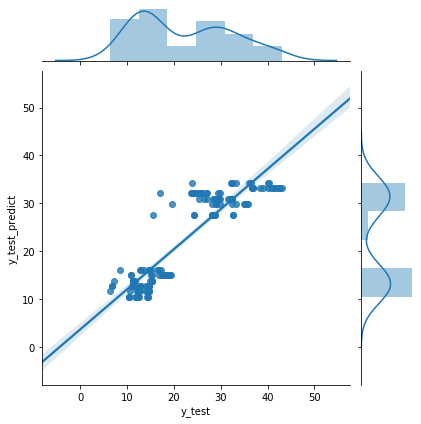

In [14]:
test = pd.DataFrame()
test['y_test'] = y_test
test['y_test_predict'] = y_test_predict

sns.jointplot(data=test, x='y_test',y='y_test_predict',kind='reg')
